In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Defining Problems:
#### Meningkatkan performa penjualan perfume atau
#### Jika penjualan sehat maka mencoba untuk memberikan rekomendasi untuk mempertahankannya

### EDA Goals:
#### Mencari tahu apakah ada hubungan antara Brand, Rating, Love juga Price
#### Menggunakan insight tersebut untuk meningkatkan penjualan

### Variabel yang digunakan:
#### Brand: Nama Merk
#### Rating: Rating yang diberikan pelanggan untuk produk tersebut
#### Love: Tingkat kepuasan pelanggan/Seberapa suka pelanggan dengan produk tersebut
#### Price: Harga produk
#### Value_Price: Harga produk ketika diskon

In [19]:
sephora = pd.read_csv('sephora.csv')
sephora.head()
# Baca dataframe

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [8]:
sephora.columns
# Check Nama Columns

Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'MarketingFlags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer'],
      dtype='object')

In [9]:
sephora.info()
# Check Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [27]:
sephora['category'].unique()
# Cek Kategori

array(['Fragrance', 'Cologne', 'Perfume', 'Body Mist & Hair Mist',
       'Body Lotions & Body Oils', 'Body Sprays & Deodorant',
       'Perfume Gift Sets', 'no category', 'Rollerballs & Travel Size',
       'Lip Balm & Treatment', 'Lotions & Oils', 'Eye Palettes',
       'Highlighter', 'Cheek Palettes', 'Lipstick', 'Face Serums',
       'Moisturizers', 'Value & Gift Sets', 'Eye Creams & Treatments',
       'Face Sunscreen', 'Lip Balms & Treatments', 'Mini Size',
       'Face Masks', 'Face Wash & Cleansers', 'Decollete & Neck Creams',
       'Face Oils', 'Hand Cream & Foot Cream', 'Face Primer',
       'Color Correct', 'Mists & Essences', 'Tinted Moisturizer',
       'Concealer', 'Beauty Supplements', 'Facial Peels', 'Exfoliators',
       'Conditioner', 'Shampoo', 'Hair Styling Products',
       'Scalp & Hair Treatments', 'Hair Masks', 'Hair Spray', 'Hair Oil',
       'Hair Primers', 'Dry Shampoo', 'Hair', 'Hair Thinning & Hair Loss',
       'Hair Straighteners & Flat Irons', 'Hair Dry

In [32]:
perfume = sephora[sephora['category']=='Perfume']
perfume
# Cek Kategori Perfume

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
5,1417609,Acqua Di Parma,Perfume,Fico di Amalfi,5 oz/ 148 mL,4.5,79,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Floral Scent Type: Fruity Fl...,no instructions,unknown,1,0,0,0
6,1638832,Acqua Di Parma,Perfume,Rosa Nobile,3.4 oz/ 101 mL,4.5,79,5000,210.0,210.0,...,True,online only,"- 0.7 oz, 20 mL Eau de Parfum Spray - 1.7 oz/...",Fragrance Family: Floral\n\nScent Type: Classi...,no instructions,unknown,1,0,0,0
9,2221596,Acqua Di Parma,Perfume,Rosa Nobile Hair Mist,1.7oz/50mL,3.0,5,2100,58.0,58.0,...,True,exclusive · online only,- 1.7oz/50mL Hair Mist,Fragrance Family: Floral\n\nScent Type: Classi...,Suggested Usage:-Spray over your hair to leave...,unknown,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8954,2047751,The 7 Virtues,Perfume,Orange Blossom Eau de Parfum,1.7 oz/ 50 mL,5.0,31,1700,79.0,79.0,...,True,exclusive,- 1.7 oz/ 50 mL Eau de Parfum Spray Orange Bl...,Fragrance Family:\n Fresh \n\nScent Type:\n Fr...,no instructions,Clean at Sephora products are formulated witho...,0,1,0,0
8959,2047744,The 7 Virtues,Perfume,Rose Amber Eau de Parfum,1.7 oz/ 50 mL,4.5,44,1900,79.0,79.0,...,True,exclusive,- 1.7 oz/ 50 mL Eau de Parfum Spray Rose Ambe...,Fragrance Family:\n Floral\n\nScent Type:\n Wa...,no instructions,Clean at Sephora products are formulated witho...,0,1,0,0
8960,2047777,The 7 Virtues,Perfume,Grapefruit Lime Eau de Parfum,1.7 oz/ 50 mL,4.5,34,1500,79.0,79.0,...,True,exclusive,- 1.7 oz/ 50 mL Eau de Parfum Spray Grapefrui...,Fragrance Family: FreshScent Type: Fresh Citru...,no instructions,Clean at Sephora products are formulated witho...,0,1,0,0
8962,2047769,The 7 Virtues,Perfume,Vetiver Elemi Eau de Parfum,1.7 oz/ 50 mL,5.0,22,955,79.0,79.0,...,True,exclusive,- 1.7 oz/ 50 mL Eau de Parfum Spray Vetiver E...,Fragrance Family:\n Earthy & Woody \n\nScent T...,no instructions,Clean at Sephora products are formulated witho...,0,1,0,0


### Missing Values

In [112]:
perfume.isna().sum()
# Mencari jumlah Missing Values

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

#### Insight Missing Values:
##### Tidak ditemukan adanya Missing Values

### Handling Outliers

### Rating Outliers

In [80]:
outliers = []
def cek_outlier(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers
# Outliers

In [81]:
outliers = []
cek_outlier(perfume['rating'])
# Cek Outliers di Rating

[3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 1.0,
 3.0,
 3.0,
 2.5,
 3.0,
 2.0,
 3.0,
 3.0,
 3.0,
 0.0,
 3.0,
 0.0,
 0.0,
 3.0,
 3.0,
 3.0,
 0.0,
 2.5,
 0.0]

In [101]:
ratingBrand = perfume[perfume['rating'].isin(outliers)].sort_values('rating', ascending=False)
ratingBrand
# Sort berdasarkan rating 

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
9,2221596,Acqua Di Parma,Perfume,Rosa Nobile Hair Mist,1.7oz/50mL,3.0,5,2100,58.0,58.0,...,True,exclusive · online only,- 1.7oz/50mL Hair Mist,Fragrance Family: Floral\n\nScent Type: Classi...,Suggested Usage:-Spray over your hair to leave...,unknown,1,1,0,0
1623,1773167,CLEAN RESERVE,Perfume,Reserve - Warm Cotton,3.4 oz/ 101 mL,3.0,207,2900,98.0,98.0,...,False,0,- 0.34 oz/ 10 mL Eau de Parfum Spray - 3.4 oz...,Fragrance Family: FreshScent Type: Fresh Citru...,no instructions,Alcohol Denat.- Fragrance- Water- Glycerin- Al...,0,0,0,0
8228,2220143,TOM FORD,Perfume,White Suede Travel Spray,0.33 oz/ 10 mL,3.0,1,755,60.0,60.0,...,False,0,- 0.33 oz/ 10 mL Eau de Parfum Spray,Fragrance Family: Warm & Spicy Scent Type: Woo...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Water- Fragrance- Butyl Methox...,0,0,0,0
6783,2011005,rag & bone,Perfume,Neroli Eau de Parfum,1.7 oz/ 50 mL,3.0,2,596,150.0,150.0,...,True,exclusive,no options,Fragrance Family: FloralScent Type: Fresh Flor...,no instructions,unknown,0,1,0,0
5184,2077972,Maison Louis Marie,Perfume,No.02 Le Long Fond Eau de Parfum,1.7 oz/ 50 mL,3.0,1,336,85.0,85.0,...,False,0,no options,Fragrance Family: Earthy & WoodyScent Type: Cl...,no instructions,\nClean at Sephora products are formulated wit...,0,0,0,0
4020,2177806,Jo Malone London,Perfume,Bronze Wood & Leather Cologne,1.7oz/50mL,3.0,3,425,130.0,130.0,...,False,0,- 1.7oz/50mL Eau de Parfum Spray - 3.4oz/100...,Fragrance Family: Earthy & Woody\n\nScent Type...,Suggested Usage:\n-Fragrance is intensified by...,unknown,0,0,0,0
3443,2205300,Guerlain,Perfume,Mon Guerlain Eau de Toilette Bloom of Rose,3.4 oz/100 mL,3.0,1,577,116.0,116.0,...,True,online only,- 3.4 oz/100 mL Eau de Toilette Spray,Fragrance Family: FreshScent Type: Fresh Flora...,Suggested Usage:-Fragrance is intensified by t...,Alcohol- Fragrance- Water- Limonene- Ethylhexy...,1,0,0,0
2956,2254662,Floral Street,Perfume,Ylang Ylang Espresso Eau De Parfum,1.7 oz/ 50 mL,3.0,406,287,78.0,78.0,...,True,exclusive · online only,- 1.7 oz/ 50 mL Eau de Parfum Spray - 0.34 o...,Fragrance Family: Warm & Spicy\nScent Type: Wa...,Suggested Usage:-Just spritz and waft. -To mak...,Alcohol Denat.- Parfum (Fragrance)- Aqua/Water...,1,1,0,0
2746,1915669,Etat Libre d'Orange,Perfume,Yes I Do,1.6 oz/ 50 mL,3.0,7,789,90.0,90.0,...,False,0,- 1.6 oz/ 50 mL Eau de Parfum Spray,Fragrance Family: FloralScent Type: Powdery Fl...,no instructions,unknown,0,0,0,0
1197,2287100,By Rosie Jane,Perfume,Lake,1.7 oz/ 50 mL,3.0,6,158,65.0,65.0,...,False,0,- 1.7 oz/ 50 mL Eau de Parfum Spray - 0.25 o...,Fragrance Family: Earthy & WoodyScent Type: Ci...,Suggested Usage:-Fragrance is intensified by t...,Methyl Dihydroxy-Dimethylbenzoate- 5-Methyl-Al...,0,0,0,0


In [102]:
ratingBrand['brand'].unique()
# Mengeluarkan nama Brand

array(['Acqua Di Parma', 'CLEAN RESERVE', 'TOM FORD', 'rag & bone',
       'Maison Louis Marie', 'Jo Malone London', 'Guerlain',
       'Floral Street', "Etat Libre d'Orange", 'By Rosie Jane',
       'BERDOUES', 'CHANEL', 'Eight & Bob', 'BVLGARI', 'JIMMY CHOO',
       'John Varvatos', 'Kilian', 'Armani Beauty', 'Yves Saint Laurent'],
      dtype=object)

In [99]:
ratingBrand = perfume.drop(['id', 'brand', 'category', 'name', 'size', 'number_of_reviews', 'love', 'price', 'value_price', 'URL', 'MarketingFlags', 'MarketingFlags_content', 'options', 'details', 'how_to_use', 'ingredients', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer'], axis=1)
ratingBrand
# Mengambil kolom Rating

,rating
2,4.5
3,4.5
5,4.5
6,4.5
9,3.0
...,...
8954,5.0
8959,4.5
8960,4.5
8962,5.0


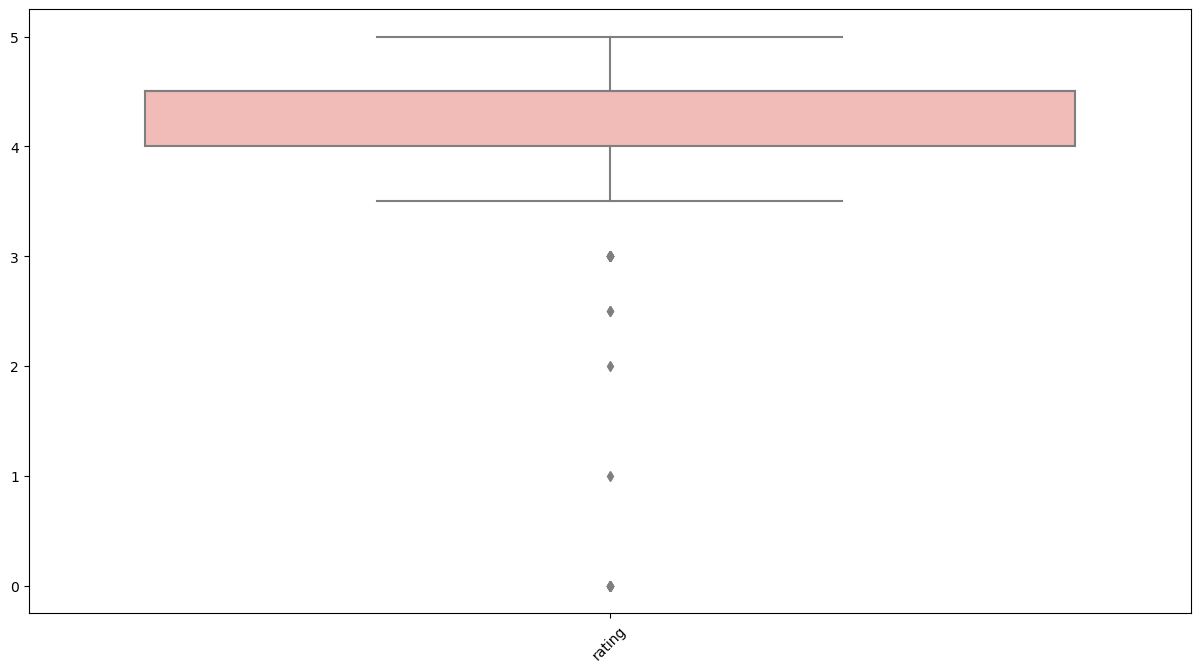

In [100]:
plt.figure(figsize=(15,8),dpi=100)
sns.boxplot(data=ratingBrand, palette='Pastel1')
plt.xticks(rotation=45)
plt.show()
# Outliers Rating secara visual

### Love Outliers

In [70]:
outliers = []
cek_outlier(perfume['love'])
# Cek Outliers di Love

[30300,
 24400,
 18100,
 19200,
 18700,
 17700,
 24200,
 111700,
 68800,
 28000,
 17900,
 24900,
 17700,
 89000,
 28500,
 47500,
 44800,
 24500,
 78000,
 18400,
 20500,
 35400,
 21700,
 36800,
 21000,
 32400,
 20600,
 17900,
 27100,
 35300,
 26600,
 43600,
 27400,
 39500,
 17600,
 37000,
 41900,
 84800,
 44300,
 24100,
 24800,
 21500,
 17700,
 31100,
 47300,
 45200,
 18000,
 32100,
 22100,
 90200,
 144700,
 19100,
 17700,
 105300,
 19200,
 43700]

In [71]:
loveBrand = perfume[perfume['love'].isin(outliers)].sort_values('love', ascending=False)
# Sort berdasarkan love

In [72]:
loveBrand['brand'].unique()
# Mengeluarkan Brand

array(['Viktor&Rolf', 'CHANEL', 'Yves Saint Laurent', 'Versace', 'Chloé',
       'Marc Jacobs Fragrances', 'DOLCE&GABBANA', 'Dior', 'Pink Sugar',
       'Prada', 'KVD Vegan Beauty', 'Maison Margiela', 'Lancôme', 'Gucci',
       'Juicy Couture', 'Jo Malone London', 'TOM FORD', 'philosophy',
       'Armani Beauty', 'Juliette Has a Gun', 'Mugler',
       'Carolina Herrera', 'Tory Burch', 'Guerlain', 'Atelier Cologne',
       'BURBERRY', 'NEST New York', 'BVLGARI'], dtype=object)

In [103]:
loveBrand = perfume.drop(['id', 'brand', 'category', 'name', 'size', 'rating', 'number_of_reviews', 'price', 'value_price', 'URL', 'MarketingFlags', 'MarketingFlags_content', 'options', 'details', 'how_to_use', 'ingredients', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer'], axis=1)
loveBrand
# Mengeluarkan kolom Love

,love
2,2600
3,2900
5,2600
6,5000
9,2100
...,...
8954,1700
8959,1900
8960,1500
8962,955


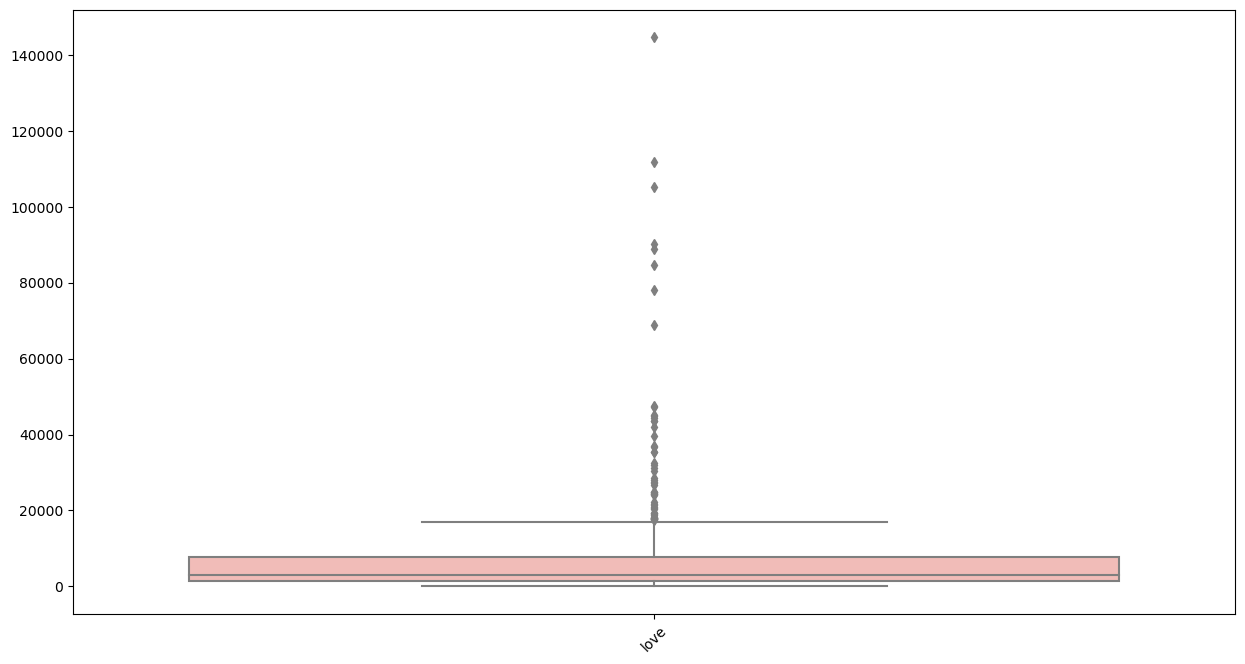

In [104]:
plt.figure(figsize=(15,8),dpi=100)
sns.boxplot(data=loveBrand, palette='Pastel1')
plt.xticks(rotation=45)
plt.show()
# Outliers Love secara visual

### Price Outliers

In [114]:
outliers = []
cek_outlier(perfume['price'])
# Cek Outliers di Price

[275.0,
 275.0,
 275.0,
 275.0,
 235.0,
 275.0,
 275.0,
 275.0,
 235.0,
 235.0,
 235.0,
 235.0,
 235.0,
 235.0,
 235.0,
 235.0,
 235.0,
 235.0,
 235.0,
 295.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 335.0,
 240.0,
 335.0,
 240.0,
 335.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 325.0,
 240.0,
 335.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 235.0,
 240.0,
 240.0]

In [115]:
priceBrand = perfume[perfume['price'].isin(outliers)].sort_values('price', ascending=False)
# Sort berdasarkan Price

In [116]:
priceBrand['brand'].unique()
# Mengeluarkan nama Brand

array(['TOM FORD', 'Kilian', 'Atelier Cologne', 'Acqua Di Parma',
       'Givenchy', 'AERIN'], dtype=object)

In [117]:
priceBrand = perfume.drop(['id', 'brand', 'category', 'name', 'size', 'rating', 'number_of_reviews', 'love', 'value_price', 'URL', 'MarketingFlags', 'MarketingFlags_content', 'options', 'details', 'how_to_use', 'ingredients', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer'], axis=1)
priceBrand
# Mengeluarkan kolom Price

,price
2,180.0
3,120.0
5,180.0
6,210.0
9,58.0
...,...
8954,79.0
8959,79.0
8960,79.0
8962,79.0


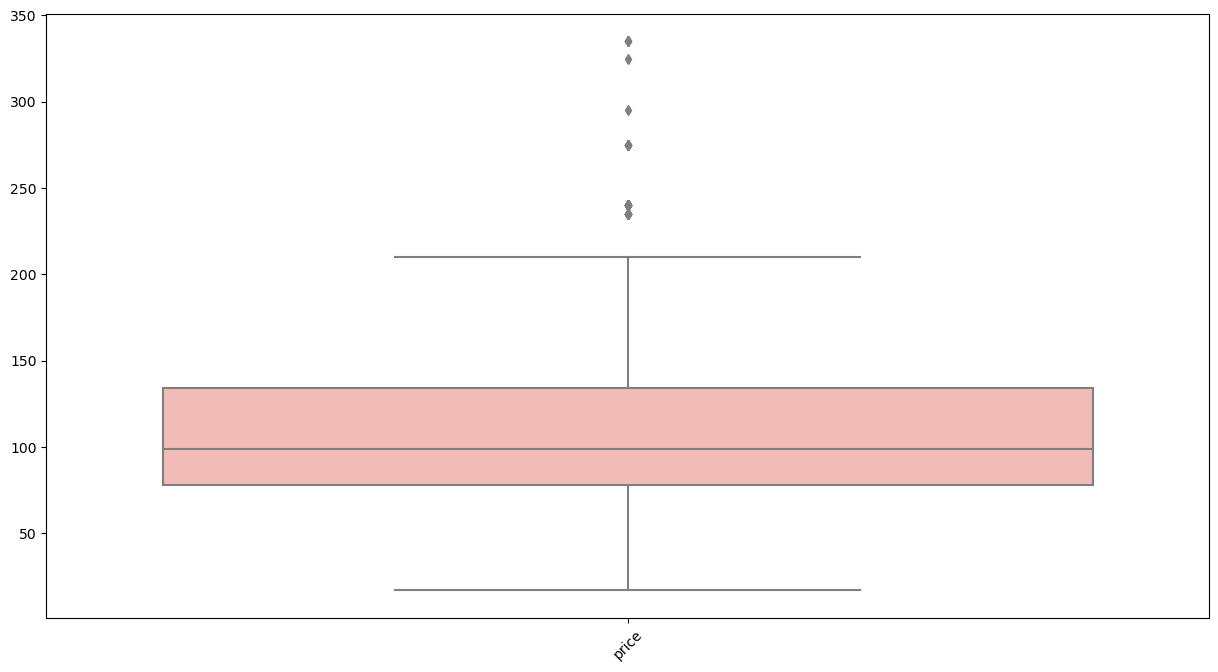

In [118]:
plt.figure(figsize=(15,8),dpi=100)
sns.boxplot(data=priceBrand, palette='Pastel1')
plt.xticks(rotation=45)
plt.show()
# Outliers Price secara visual

### ValuePrice Outliers

In [119]:
outliers = []
cek_outlier(perfume['value_price'])
# Cek Outliers di ValuePrice

[275.0,
 275.0,
 275.0,
 275.0,
 235.0,
 275.0,
 275.0,
 275.0,
 235.0,
 235.0,
 235.0,
 235.0,
 235.0,
 235.0,
 235.0,
 235.0,
 235.0,
 235.0,
 235.0,
 295.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 335.0,
 240.0,
 335.0,
 240.0,
 335.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 325.0,
 240.0,
 335.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 235.0,
 240.0,
 240.0]

In [120]:
valueBrand = perfume[perfume['value_price'].isin(outliers)].sort_values('value_price', ascending=False)
# Sort berdasarkan ValuePrice

In [121]:
valueBrand['brand'].unique()
# Mengeluarkan Nama Brand

array(['TOM FORD', 'Kilian', 'Atelier Cologne', 'Acqua Di Parma',
       'Givenchy', 'AERIN'], dtype=object)

In [122]:
valueBrand = perfume.drop(['id', 'brand', 'category', 'name', 'size', 'rating', 'number_of_reviews', 'love', 'price', 'URL', 'MarketingFlags', 'MarketingFlags_content', 'options', 'details', 'how_to_use', 'ingredients', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer'], axis=1)
valueBrand
# Mengeluarkan kolom ValuePrice

,value_price
2,180.0
3,120.0
5,180.0
6,210.0
9,58.0
...,...
8954,79.0
8959,79.0
8960,79.0
8962,79.0


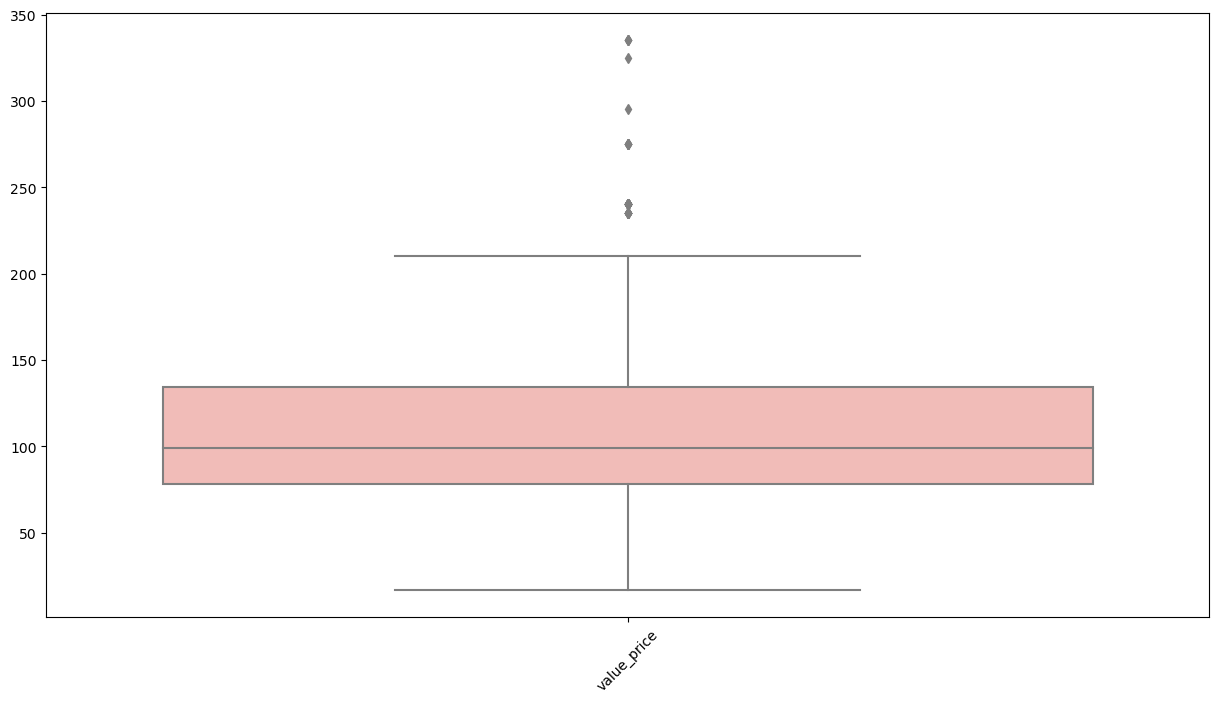

In [123]:
plt.figure(figsize=(15,8),dpi=100)
sns.boxplot(data=valueBrand, palette='Pastel1')
plt.xticks(rotation=45)
plt.show()
# Outliers ValuePrice secara Visual

In [124]:
result = perfume.drop(['id', 'brand', 'category', 'name', 'size', 'number_of_reviews', 'URL', 'MarketingFlags', 'MarketingFlags_content', 'options', 'details', 'how_to_use', 'ingredients', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer'], axis=1)
result
# Hasil dari variabel2 yang dipakai

,rating,love,price,value_price
2,4.5,2600,180.0,180.0
3,4.5,2900,120.0,120.0
5,4.5,2600,180.0,180.0
6,4.5,5000,210.0,210.0
9,3.0,2100,58.0,58.0
...,...,...,...,...
8954,5.0,1700,79.0,79.0
8959,4.5,1900,79.0,79.0
8960,4.5,1500,79.0,79.0
8962,5.0,955,79.0,79.0


### Rating, Love, Price, ValuePrice Insight

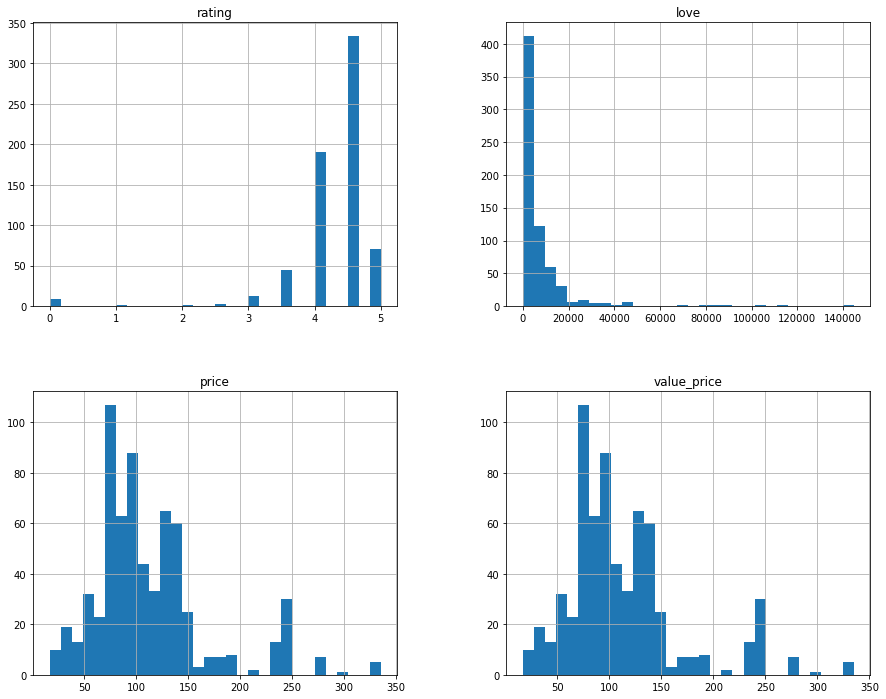

In [125]:
result.hist(figsize=(15,12), bins=30)
plt.show()
# Hasil dari variabel2 yang dipakai secara visual

### Insight Rating:
#### Brand dibawah ini banyak yang tingkat rating di bawah jika dibandingkan dengan Brand lain
##### 'Acqua Di Parma', 'CLEAN RESERVE', 'TOM FORD', 'rag & bone',
##### 'Maison Louis Marie', 'Jo Malone London', 'Guerlain',
##### 'Floral Street', "Etat Libre d'Orange", 'By Rosie Jane',
##### 'BERDOUES', 'CHANEL', 'Eight & Bob', 'BVLGARI', 'JIMMY CHOO',
##### 'John Varvatos', 'Kilian', 'Armani Beauty', 'Yves Saint Laurent

### Insight Love:
#### Brand dibawah ini banyak yang tingkat 'love' di atas jika dibandingkan dengan Brand lain
##### 'Viktor&Rolf', 'CHANEL', 'Yves Saint Laurent', 'Versace', 'Chloé',
##### 'Marc Jacobs Fragrances', 'DOLCE&GABBANA', 'Dior', 'Pink Sugar',
##### 'Prada', 'KVD Vegan Beauty', 'Maison Margiela', 'Lancôme', 'Gucci',
##### 'Juicy Couture', 'Jo Malone London', 'TOM FORD', 'philosophy',
##### 'Armani Beauty', 'Juliette Has a Gun', 'Mugler',
##### 'Carolina Herrera', 'Tory Burch', 'Guerlain', 'Atelier Cologne',
##### 'BURBERRY', 'NEST New York', 'BVLGARI'

### Insight Price:
#### Brand dibawah ini banyak yang price di atas jika dibandingkan dengan Brand lain
##### 'TOM FORD', 'Kilian', 'Atelier Cologne', 'Acqua Di Parma',
##### 'Givenchy', 'AERIN'

### Insight ValuePrice:
#### Brand dibawah ini banyak yang ValuePrice di atas jika dibandingkan dengan Brand lain
##### TOM FORD', 'Kilian', 'Atelier Cologne', 'Acqua Di Parma',
##### 'Givenchy', 'AERIN'

### Conclusion:
##### Price dan ValuePrice yang di atas rata-rata memiliki Brand yang sama
##### 'TOM FORD' memiliki harga yang di atas rata-rata tetapi di saat bersamaan juga memiliki Rating yang rendah dan tingkat Love yang tinggi
##### 'Kilian' memiliki harga yang di atas rata-rata tetapi di saat bersamaan juga memiliki Rating yang rendah dan Love yang average
##### 'Atelier Cologne' memiliki harga yang di atas rata-rata dan di saat bersamaan juga memiliki tingkat Love yang tinggi dan Rating yang average
##### 'Acqua Di Parma' memiliki harga yang di atas rata-rata tetapi di saat bersamaan juga memiliki Rating yang rendah dan Love yang average
##### 'Givenchy' dan 'AERIN' memiliki harga yang di atas rata-rata dengan tingkat Rating dan Love yang average

### Top & Bottom Brand

In [132]:
perfumeTopBottomRate = perfume[['brand', 'rating']].sort_values('rating', ascending=False)
perfumeTop10Rate = perfumeTopBottomRate.head(10)
perfumeBottom10Rate = perfumeTopBottomRate.tail(10)
perfumeTotalRate = pd.concat([perfumeTop10Rate, perfumeBottom10Rate])
perfumeTotalRate
# Mencari Top & Bottom Brand berdasarkan Rating

,brand,rating
6648,PINROSE,5.0
5588,Montblanc,5.0
8271,TOM FORD,5.0
505,Atelier Cologne,5.0
2614,Eight & Bob,5.0
8273,TOM FORD,5.0
8282,TOM FORD,5.0
7548,SKYLAR,5.0
3429,Guerlain,5.0
8301,TOM FORD,5.0


In [130]:
perfumeTopBottomLove = perfume[['brand', 'love']].sort_values('love', ascending=False)
perfumeTop10Love = perfumeTopBottomLove.head(10)
perfumeBottom10Love = perfumeTopBottomLove.tail(10)
perfumeTotalLove = pd.concat([perfumeTop10Love, perfumeBottom10Love])
perfumeTotalLove
# Mencari Top & Bottom Brand berdasarkan Love

,brand,love
8621,Viktor&Rolf,144700
1306,CHANEL,111700
8871,Yves Saint Laurent,105300
8591,Versace,90200
1433,Chloé,89000
5383,Marc Jacobs Fragrances,84800
2234,DOLCE&GABBANA,78000
1307,CHANEL,68800
2103,Dior,47500
6627,Pink Sugar,47300


In [134]:
perfumeTopBottomPrice = perfume[['brand', 'price']].sort_values('price', ascending=False)
perfumeTop10Price = perfumeTopBottomPrice.head(10)
perfumeBottom10Price = perfumeTopBottomPrice.tail(10)
perfumeTotalPrice = pd.concat([perfumeTop10Price, perfumeBottom10Price])
perfumeTotalPrice
# Mencari Top & Bottom Brand berdasarkan Price

,brand,price
8197,TOM FORD,335.0
8194,TOM FORD,335.0
8277,TOM FORD,335.0
8187,TOM FORD,335.0
8269,TOM FORD,325.0
4452,Kilian,295.0
14,Acqua Di Parma,275.0
34,Acqua Di Parma,275.0
27,Acqua Di Parma,275.0
33,Acqua Di Parma,275.0


In [135]:
perfumeTopBottomValue = perfume[['brand', 'value_price']].sort_values('value_price', ascending=False)
perfumeTop10Value = perfumeTopBottomValue.head(10)
perfumeBottom10Value = perfumeTopBottomValue.tail(10)
perfumeTotalValue = pd.concat([perfumeTop10Value, perfumeBottom10Value])
perfumeTotalValue
# Mencari Top & Bottom Brand berdasarkan ValuePrice

,brand,value_price
8197,TOM FORD,335.0
8194,TOM FORD,335.0
8277,TOM FORD,335.0
8187,TOM FORD,335.0
8269,TOM FORD,325.0
4452,Kilian,295.0
14,Acqua Di Parma,275.0
34,Acqua Di Parma,275.0
27,Acqua Di Parma,275.0
33,Acqua Di Parma,275.0


### Univariate:

In [169]:
print(perfume['limited_edition'].value_counts())
# Menghitung jumlah product Limited

0    639
1     26
Name: limited_edition, dtype: int64


In [164]:
perfumeLimited = perfume[perfume['limited_edition'] == 1]
perfumeNotLimited = perfume[perfume['limited_edition'] == 0]

In [165]:
perfumeLimited.head()
# Hasil produk limited

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
1354,2120780,CHANEL,Perfume,CHANCE EAU TENDRE\nDelicate Fragrance Touch-Up,0.18 oz,2.5,6,1300,70.0,70.0,...,True,limited edition · online only,no options,Fragrance Family: FloralScent Type: Fruity Flo...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,0,1,0
1447,1981356,Chloé,Perfume,Chloé Absolu de Parfum,2.5 oz/ 75 mL,4.5,20,2800,145.0,145.0,...,True,limited edition,- 1.7 oz/ 50 mL Eau de Parfum Spray - 2.5 oz/...,Fragrance Family: FloralScent Type: Classic Fl...,no instructions,Alcohol Denat.- Fragrance- Water- Ethylhexyl M...,0,0,1,0
1616,2319655,CLEAN RESERVE,Perfume,Reserve - Radiant Nectar,3.4 oz/ 100 mL,4.5,22,1100,98.0,98.0,...,True,limited edition · exclusive,- 3.4 oz/ 100 mL Eau de Parfum Spray - 0.34 ...,Fragrance Family: Fresh\n\nScent Type: Fresh C...,Suggested Usage:\n-Fragrance is intensified by...,Alcohol Denat.- Parfum/Fragrance- Aqua/Water/E...,0,1,1,0
1658,1997386,CLEAN RESERVE,Perfume,Classic - Warm Cashmere,1 oz/ 30 mL,3.5,7,650,44.0,44.0,...,True,limited edition,no options,Fragrance Family: Earthy & WoodyScent Type: Wa...,no instructions,Clean at Sephora products are formulated witho...,0,0,1,0
2238,2319317,DOLCE&GABBANA,Perfume,Light Blue Love Is Love Pour Femme Eau de Toil...,1.6 oz/ 50 mL,4.5,3,740,80.0,80.0,...,True,limited edition,no options,Fragrance Family: FreshScent Type: Fresh Citru...,Suggested Usage:-Fragrance is intensified by t...,unknown,0,0,1,0


In [167]:
perfumeNotLimited.head()
# Hasil produk Not Limited

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
5,1417609,Acqua Di Parma,Perfume,Fico di Amalfi,5 oz/ 148 mL,4.5,79,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Floral Scent Type: Fruity Fl...,no instructions,unknown,1,0,0,0
6,1638832,Acqua Di Parma,Perfume,Rosa Nobile,3.4 oz/ 101 mL,4.5,79,5000,210.0,210.0,...,True,online only,"- 0.7 oz, 20 mL Eau de Parfum Spray - 1.7 oz/...",Fragrance Family: Floral\n\nScent Type: Classi...,no instructions,unknown,1,0,0,0
9,2221596,Acqua Di Parma,Perfume,Rosa Nobile Hair Mist,1.7oz/50mL,3.0,5,2100,58.0,58.0,...,True,exclusive · online only,- 1.7oz/50mL Hair Mist,Fragrance Family: Floral\n\nScent Type: Classi...,Suggested Usage:-Spray over your hair to leave...,unknown,1,1,0,0


In [172]:
print(perfume['limited_time_offer'].value_counts())
# Menghitung Product di limited time offer

0    665
Name: limited_time_offer, dtype: int64


#### Insight Jumlah Limited Edition
##### Kebanyakkan Brand perfume memilih untuk tidak membuat Limited Edition
##### Tidak ada Brand perfume yang memilih untuk membuat Limited Time Offer

### Multivariate

In [183]:
limitedRate = pd.crosstab(index = perfume['rating'], columns = perfume['limited_edition'])
limitedRate
# Rating dan Limited Edition

limited_edition,0,1
rating,,
0.0,7,2
1.0,1,0
2.0,1,0
2.5,1,1
3.0,12,0
3.5,43,2
4.0,181,10
4.5,326,8
5.0,67,3


#### Insight:
##### Produk Limited memiliki Rating lebih tinggi

In [196]:
limitedPrice = pd.crosstab(index = perfume['price'], columns = perfume['limited_edition'])
limitedPrice
# Price dan Limited Edition

limited_edition,0,1
price,,
17.0,1,0
24.0,1,0
25.0,3,0
26.0,2,0
27.0,3,0
...,...,...
240.0,30,0
275.0,7,0
295.0,1,0


In [188]:
limitedPrice = limitedPrice.reset_index()
limitedPrice

limited_edition,index,price,0,1
0,0,17.0,1,0
1,1,24.0,1,0
2,2,25.0,3,0
3,3,26.0,2,0
4,4,27.0,3,0
...,...,...,...,...
101,101,240.0,30,0
102,102,275.0,7,0
103,103,295.0,1,0
104,104,325.0,1,0


In [191]:
limitedPriceSort = limitedPrice[['price', 0, 1]].sort_values('price', ascending=False)
perfumeTop10PriceSort = limitedPriceSort.head(10)
perfumeBottom10PriceSort = limitedPriceSort.tail(10)
perfumeTotalPriceSort = pd.concat([perfumeTop10PriceSort, perfumeBottom10PriceSort])
perfumeTotalPriceSort
# Top & Bottom untuk Price & Limited

limited_edition,price,0,1
105,335.0,4,0
104,325.0,1,0
103,295.0,1,0
102,275.0,7,0
101,240.0,30,0
100,235.0,13,0
99,210.0,1,1
98,195.0,1,0
97,190.0,7,0
96,180.0,7,0


#### Insight Limited & Price:
##### Antara harga murah maupun tinggi, Limited Edition tidak menjadi soal
##### Merupakan salah satu alasan kenapa Brand memilih untuk tidak membuat product limited karena hal tersebut tidak mengubah banyak harga walaupun Rating bisa lebih tinggi

### Plot

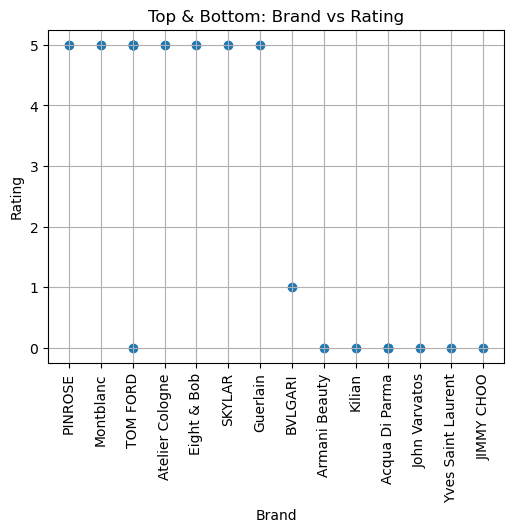

In [197]:
plt.figure(figsize=(20,15),dpi=100)
plt.subplot(3,3,3)
plt.scatter(perfumeTotalRate['brand'], perfumeTotalRate['rating'])
plt.title("Top & Bottom: Brand vs Rating")
plt.xlabel("Brand")
plt.ylabel("Rating")
plt.grid()
plt.xticks(rotation=90)
plt.show()
# Plot untuk perbandingan antara Brand vs Rating

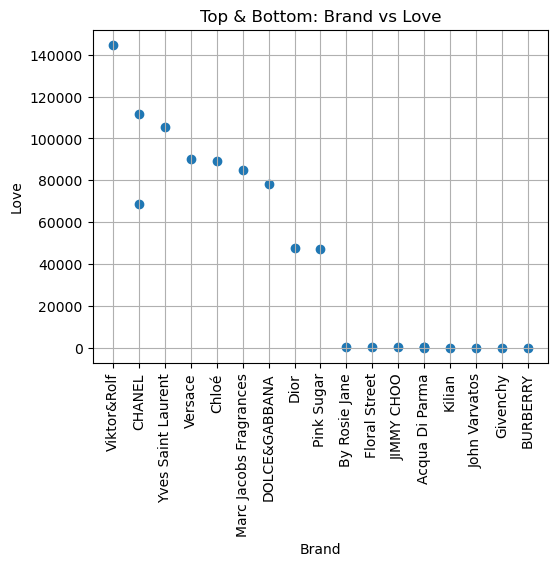

In [198]:
plt.figure(figsize=(20,15),dpi=100)
plt.subplot(3,3,3)
plt.scatter(perfumeTotalLove['brand'], perfumeTotalLove['love'])
plt.title("Top & Bottom: Brand vs Love")
plt.xlabel("Brand")
plt.ylabel("Love")
plt.grid()
plt.xticks(rotation=90)
plt.show()
# Plot untuk perbandingan antara Brand vs Love

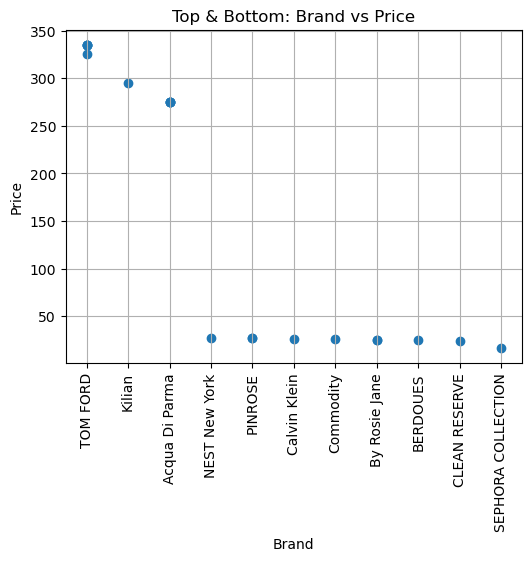

In [199]:
plt.figure(figsize=(20,15),dpi=100)
plt.subplot(3,3,3)
plt.scatter(perfumeTotalPrice['brand'], perfumeTotalPrice['price'])
plt.title("Top & Bottom: Brand vs Price")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.grid()
plt.xticks(rotation=90)
plt.show()
# Plot untuk perbandingan antara Brand vs Price

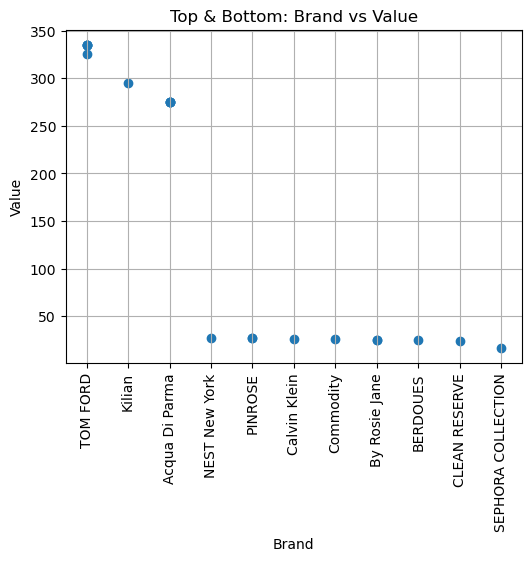

In [200]:
plt.figure(figsize=(20,15),dpi=100)
plt.subplot(3,3,3)
plt.scatter(perfumeTotalValue['brand'], perfumeTotalValue['value_price'])
plt.title("Top & Bottom: Brand vs Value")
plt.xlabel("Brand")
plt.ylabel("Value")
plt.grid()
plt.xticks(rotation=90)
plt.show()
# Plot untuk perbandingan antara Brand vs ValuePrice

### Correlation:

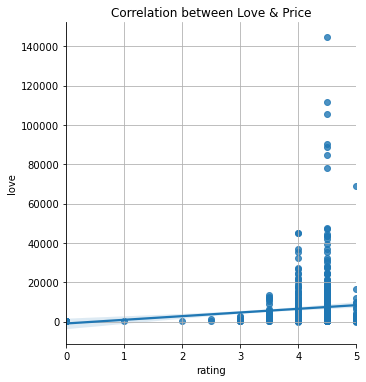

In [160]:
sns.lmplot(x='rating', y='love', data=perfume)
plt.title("Correlation between Rating & Love")
plt.grid()
plt.show()
# Korelasi antara Rating & Love

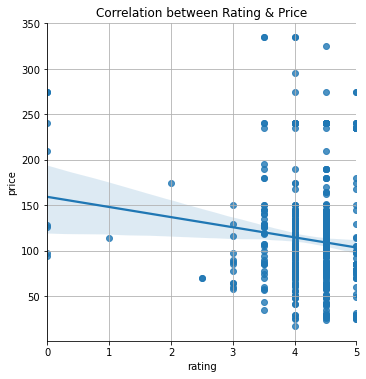

In [161]:
sns.lmplot(x='rating', y='price', data=perfume)
plt.title("Correlation between Rating & Price")
plt.grid()
plt.show()
# Korelasi antara Rating & Price

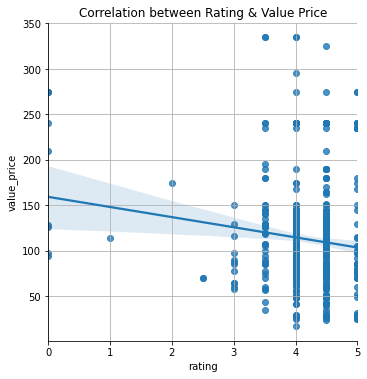

In [162]:
sns.lmplot(x='rating', y='value_price', data=perfume)
plt.title("Correlation between Rating & Value Price")
plt.grid()
plt.show()
# Korelasi antara Rating & ValuePrice

#### Insight Correlation:
##### Antara Rating & Love hasil positif, makin tinggi rating makin tinggi tingkat Love
##### Antara Rating & Price, semakin murah maka semakin tinggi Rating
##### Antara Rating & ValuePrice, semakin murah maka semakin tinggi Rating

#### Kesimpulan:
##### Antara Limited & Harga tidak ada hubungan tetapi dapat menaikkan Rating
##### Rating yang rendah bisa saja memiliki tingkat Love yang tinggi
##### 'Atelier Cologne' merupakan Brand yang bagus karena memiliki harga yang di atas rata-rata dan di saat bersamaan juga memiliki tingkat Love yang tinggi walau dengan Rating yang average

#### Saran:
##### Jika ingin melakukan marketing terhadap suatu Produk maka melakukan Limited adalah salah satu cara terbaik tetapi tidak membantu Price
##### 'Atelier Cologne' membuktikkan harga yang tinggi juga bisa memiliki Rating dan Love yang tinggi
##### Salah satu cara meningkatkan penjualan adalah dengan meninggikan tingkat Kualitas dan Rating
##### Konsumer tidak begitu peduli tentang Harga selama kualitas memang terjamin (contoh: 'Atelier Cologne')
##### Kekuatan nama Brand masih lumayan kuat, terbukti dengan masih adanya Brand mahal walaupun tingkat Rating & Love hanya di rata-rata